# Table of Contents

#### 01 Importing Libraries and Data

#### 02 Data Cleaning

#### 03 Elbow Technique

#### 04 k-means Algorithm UCR

#### 05 k-means Algorithm SHR

#### 06 Exports

# 01 Importing Libraries and Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [6]:
# allow matplotlib visuals to be displayed
%matplotlib inline

In [7]:
path = r'/Users/Dena/Murder Data Analysis'

In [8]:
# import the clean UCR data
df_ucr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ucr_clean.pkl'))

In [9]:
# check the shape
df_ucr.shape

(166225, 10)

In [10]:
# check the output
df_ucr.head()

,ORI,name,year,murders,cleared,state,county,agency,cold_cases,region
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage,1,West
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage,2,West
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage,0,West
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage,2,West
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage,3,West


In [11]:
# import the clean SHR data
df_shr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'shr_clean_3.pkl'))

In [12]:
# check the shape
df_shr.shape

(804735, 31)

In [13]:
# show all columns
pd.set_option('display.max_columns', None)

In [14]:
# check the output
df_shr.head()

,ID,county,ORI,state,agency,agent_type,source,solved,year,month,incident,action_type,homicide,situation,victim_age,victim_sex,victim_race,victim_ethnicity,offender_age,offender_sex,offender_race,offender_ethnicity,weapon,relationship,circumstance,subcircumstance,additional_victims,additional_offenders,MSA,region,victim_age_category
0,197603001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,Unknown,Unknown or not reported,68,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other arguments,nan,0,0,"Anchorage, AK",West,Middle Age
1,197604001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,April,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Female,White,Unknown or not reported,44,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Girlfriend,Other arguments,nan,0,0,"Anchorage, AK",West,Young Adult
2,197606001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,38,Male,White,Unknown or not reported,27,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Stranger,Other,nan,0,0,"Anchorage, AK",West,Middle Age
3,197606002AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,June,2,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,41,Male,White,Unknown or not reported,34,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,nan,0,0,"Anchorage, AK",West,Middle Age
4,197607001AK00101,"Anchorage, AK",AK00101,Alaska,Anchorage,Municipal police,FBI,Yes,1976,July,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,33,Male,American Indian or Alaskan Native,Unknown or not reported,37,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,nan,0,0,"Anchorage, AK",West,Young Adult


# 02 Data Cleaning

In [15]:
# get rid of all non-numerical columns in the UCR
df_ucr.drop(columns=['ORI', 'name', 'year', 'state', 'county', 'agency', 'region'], inplace=True)

In [16]:
# check the output
df_ucr.head()

,murders,cleared,cold_cases
0,7,6,1
1,18,16,2
2,1,1,0
3,7,5,2
4,7,4,3


In [17]:
df_shr.columns

Index(['ID', 'county', 'ORI', 'state', 'agency', 'agent_type', 'source',
       'solved', 'year', 'month', 'incident', 'action_type', 'homicide',
       'situation', 'victim_age', 'victim_sex', 'victim_race',
       'victim_ethnicity', 'offender_age', 'offender_sex', 'offender_race',
       'offender_ethnicity', 'weapon', 'relationship', 'circumstance',
       'subcircumstance', 'additional_victims', 'additional_offenders', 'MSA',
       'region', 'victim_age_category'],
      dtype='object')

In [18]:
# get rid of all non-numerical columns in the SHR
df_shr.drop(columns=['ID', 'county', 'ORI', 'state', 'agency', 'agent_type', 'source',
       'solved', 'year', 'month', 'incident', 'action_type', 'homicide',
       'situation', 'victim_sex', 'victim_race',
       'victim_ethnicity', 'offender_sex', 'offender_race',
       'offender_ethnicity', 'weapon', 'relationship', 'circumstance',
       'subcircumstance', 'MSA',
       'region', 'victim_age_category'], inplace=True)

In [19]:
# check the output
df_shr.head()

,victim_age,offender_age,additional_victims,additional_offenders
0,48,68,0,0
1,33,44,0,0
2,38,27,0,0
3,41,34,0,0
4,33,37,0,0


# 03 Elbow Technique

For the UCR:

In [20]:
num_cl = range(1, 10) # range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters in the above range

In [21]:
score = [kmeans[i].fit(df_ucr).score(df_ucr) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-312455728.1779571,
 -140135256.5428948,
 -83721358.9142097,
 -53545075.39306528,
 -39530035.52083693,
 -28338006.321171675,
 -22631964.05689963,
 -18949878.586566135,
 -16855949.5851398]

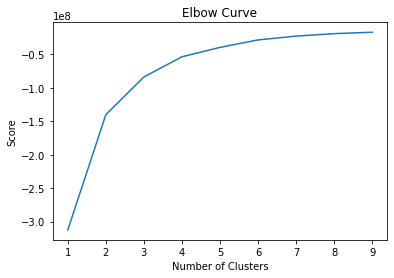

In [22]:
# plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters is where the curve starts to flatten out, at 4.

For the SHR:

In [23]:
num_c2 = range(1, 10) # range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters in the above range

In [24]:
score = [kmeans[i].fit(df_shr).score(df_shr) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-299268546.22116137,
 -155645674.27488086,
 -117962520.66273692,
 -88166417.35802029,
 -73327936.89968641,
 -61283603.06496088,
 -52042639.985623494,
 -45834869.59502259,
 -40276353.823037006]

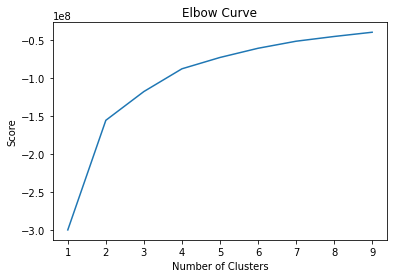

In [25]:
# plot the elbow curve using PyLab

pl.plot(num_c2,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters here is 4.

# 04 k-means Algorithm UCR

In [26]:
# create the k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [27]:
# fit the k-means object to the data
kmeans.fit(df_ucr)

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [28]:
# create a clusters column
df_ucr['clusters'] = kmeans.fit_predict(df_ucr)

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [29]:
# check the output
df_ucr.head()

,murders,cleared,cold_cases,clusters
0,7,6,1,0
1,18,16,2,0
2,1,1,0,0
3,7,5,2,0
4,7,4,3,0


In [30]:
df_ucr['clusters'].value_counts()

0    164607
2      1387
1       207
3        24
Name: clusters, dtype: int64

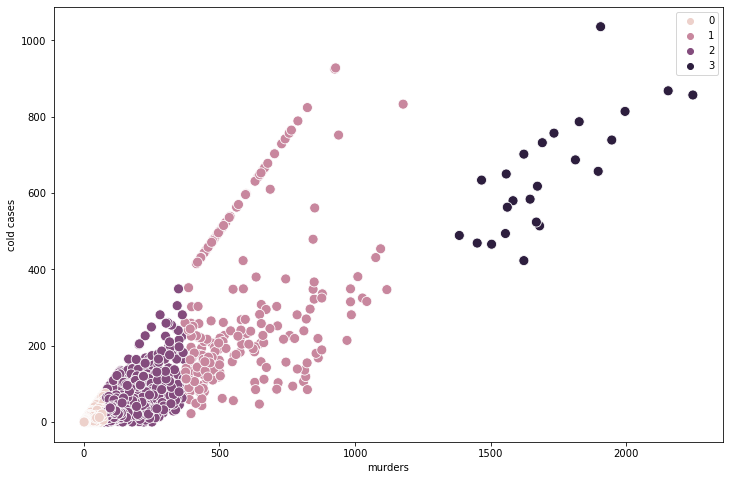

In [31]:
# Plot the clusters for the "murders" and "cold cases" variables.

plt.figure(figsize=(12,8))
ax1 = sns.scatterplot(x=df_ucr['murders'], y=df_ucr['cold_cases'], hue=kmeans.labels_, s=100) 

ax1.grid(False)
plt.xlabel('murders')
plt.ylabel('cold cases')
plt.show()

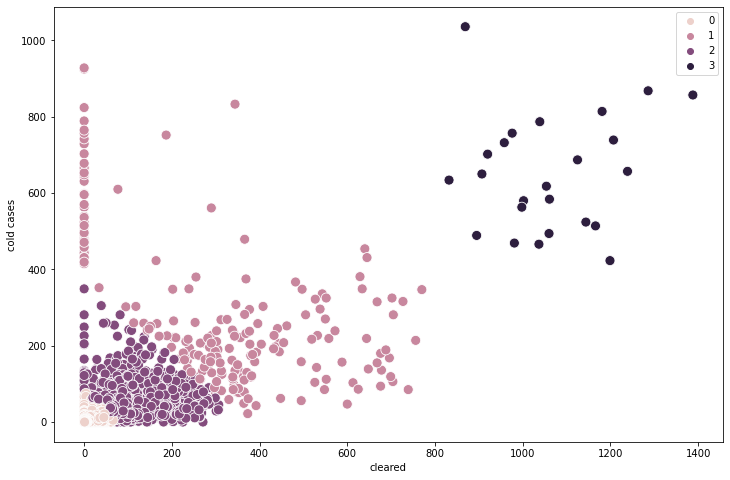

In [32]:
# plot the clusters for the "clearances" and "cold_cases" variables

plt.figure(figsize=(12,8))
ax2 = sns.scatterplot(x=df_ucr['cleared'], y=df_ucr['cold_cases'], hue=kmeans.labels_, s=100)

ax2.grid(False) 
plt.xlabel('cleared') 
plt.ylabel('cold cases') 
plt.show()

In [33]:
df_ucr.loc[df_ucr['clusters'] == 0, 'cluster'] = 'light pink'
df_ucr.loc[df_ucr['clusters'] == 1, 'cluster'] = 'dark pink'
df_ucr.loc[df_ucr['clusters'] == 2, 'cluster'] = 'purple'
df_ucr.loc[df_ucr['clusters'] == 3, 'cluster'] = 'dark purple'

In [34]:
df_ucr.groupby('cluster').agg({'murders':['mean', 'median'], 
                         'cleared':['mean', 'median'], 
                         'cold_cases':['mean', 'median']})

murders             cleared          cold_cases       
                    mean median         mean  median        mean median
cluster                                                                
dark pink     592.367150    541   300.966184   302.0  291.400966    223
dark purple  1715.333333   1670  1063.500000  1046.5  651.833333    642
light pink      3.534030      1     2.476887     1.0    1.115445      0
purple        148.850757    121    94.369142    78.0   54.520548     43

Thoughts/Findings

These clusters make sense. There are 4 main clusters of data in the UCR, depending on the how many murders/cleared there are. The majority of the data is in the light pink cluster, close to 0, and each cluster has fewer data points the farther we are from 0. Each successive cluster has a higher median/mean as we get further from 0. The final cluster (dark purple) has only 24 data points. I am curious to see which counties/years those 24 data points come from.

In [37]:
# show all rows
pd.set_option('display.max_rows', None)

In [39]:
# locate the dark purple data points
df_ucr.loc[df_ucr['cluster'] == 'dark purple']

,murders,cleared,cold_cases,clusters,cluster
105634,1466,832,634,3,dark purple
105635,1690,958,732,3,dark purple
105636,1680,1166,514,3,dark purple
105637,1554,1060,494,3,dark purple
105638,1645,1061,584,3,dark purple
105639,1622,920,702,3,dark purple
105640,1557,907,650,3,dark purple
105641,1503,1037,466,3,dark purple
105642,1733,976,757,3,dark purple
105643,1812,1125,687,3,dark purple


I have the index numbers here and can reference them at a later date to match them with their counties and years.

# 05 k-means Algorithm SHR

In [40]:
# fit the k-means object to the data
kmeans.fit(df_shr)

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [41]:
# create a clusters column
df_shr['clusters'] = kmeans.fit_predict(df_shr)

/Users/Dena/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [42]:
# check the output
df_shr.head()

,victim_age,offender_age,additional_victims,additional_offenders,clusters
0,48,68,0,0,0
1,33,44,0,0,1
2,38,27,0,0,1
3,41,34,0,0,1
4,33,37,0,0,1


In [43]:
df_shr['clusters'].value_counts()

2    338450
1    290861
3     96146
0     79278
Name: clusters, dtype: int64

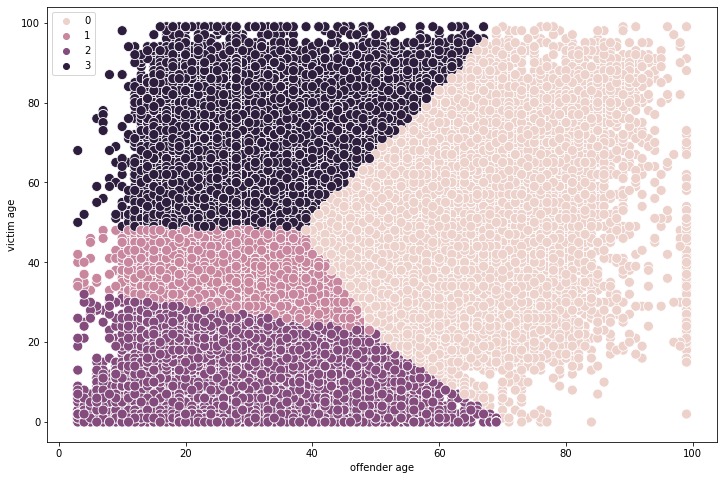

In [44]:
# Plot the clusters for the "victim_age" and "offender_age" variables.

plt.figure(figsize=(12,8))
ax3 = sns.scatterplot(x=df_shr['offender_age'], y=df_shr['victim_age'], hue=kmeans.labels_, s=100) 

ax3.grid(False)
plt.xlabel('offender age')
plt.ylabel('victim age')
plt.show()

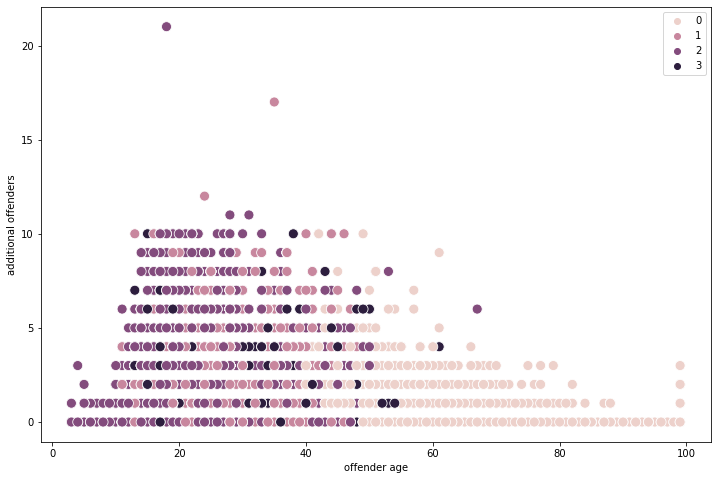

In [46]:
# Plot the clusters for the "offender_age" and "additional_offenders" variables.

plt.figure(figsize=(12,8))
ax4 = sns.scatterplot(x=df_shr['offender_age'], y=df_shr['additional_offenders'], hue=kmeans.labels_, s=100) 

ax4.grid(False)
plt.xlabel('offender age')
plt.ylabel('additional offenders')
plt.show()

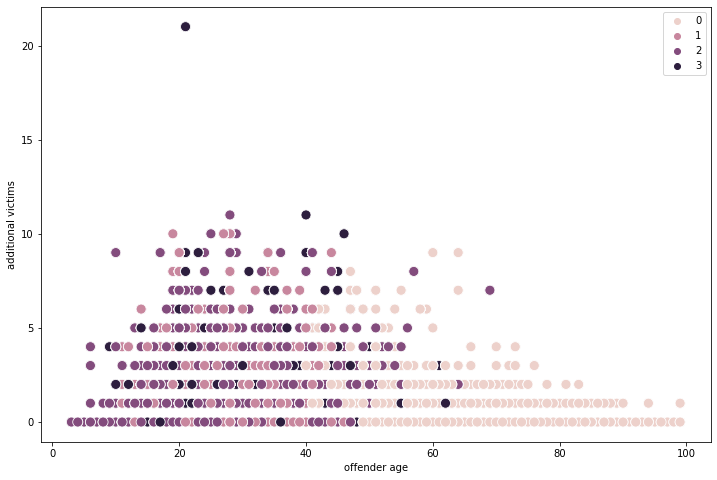

In [47]:
# Plot the clusters for the "offender_age" and "additional_victims" variables.

plt.figure(figsize=(12,8))
ax5 = sns.scatterplot(x=df_shr['offender_age'], y=df_shr['additional_victims'], hue=kmeans.labels_, s=100) 

ax5.grid(False)
plt.xlabel('offender age')
plt.ylabel('additional victims')
plt.show()

In [48]:
df_shr.loc[df_shr['clusters'] == 0, 'cluster'] = 'light pink'
df_shr.loc[df_shr['clusters'] == 1, 'cluster'] = 'dark pink'
df_shr.loc[df_shr['clusters'] == 2, 'cluster'] = 'purple'
df_shr.loc[df_shr['clusters'] == 3, 'cluster'] = 'dark purple'

In [51]:
# check the output
df_shr.head()

,victim_age,offender_age,additional_victims,additional_offenders,clusters,cluster
0,48,68,0,0,0,light pink
1,33,44,0,0,1,dark pink
2,38,27,0,0,1,dark pink
3,41,34,0,0,1,dark pink
4,33,37,0,0,1,dark pink


In [53]:
df_shr.groupby('cluster').agg({'offender_age':['mean', 'median'], 
                         'victim_age':['mean', 'median'], 
                         'additional_offenders':['mean', 'median'],
                         'additional_victims':['mean', 'median']})

offender_age        victim_age        additional_offenders         \
                    mean median       mean median                 mean median   
cluster                                                                         
dark pink      28.927178     28  35.190156     34             0.171625      0   
dark purple    28.803299     28  61.959239     59             0.190263      0   
light pink     54.625331     52  46.005285     45             0.060105      0   
purple         25.640558     28  19.608332     21             0.221389      0   

            additional_victims         
                          mean median  
cluster                                
dark pink             0.105136      0  
dark purple           0.156866      0  
light pink            0.108214      0  
purple                0.143099      0

Thoughts/Findings

These clusters make sense for the first visual, but the last two appear a little strange. <br><br> In the first visual we have 4 groups, depending on the ages of the offenders and victims. There are 3 groups of offenders with a median age of 28 who have different victim age categories: meadians of 21, 34, and 59. The final offender category has a median age of 52, whose victims have a median age of 45. It might be interesting to explore this last cluster of older offenders, and see how their behavior differs from the younger offenders. 
<br><br>
In the final two visuals, we have one category of older offenders (light pink), but the rest of the categories appear to be jumbled together and are not very insightful.

# 06 Exports

In [56]:
# export the clustered UCR data
df_ucr.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ucr_cluster.pkl'))

In [55]:
# export the clustered SHR data
df_shr.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'shr_cluster.pkl'))

In [58]:
# export the visuals
ax1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_cluster_1.png'),bbox_inches = 'tight')

In [59]:
ax2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ucr_cluster_2.png'),bbox_inches = 'tight')

In [60]:
ax3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_cluster_1.png'),bbox_inches = 'tight')

In [61]:
ax4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_cluster_2.png'),bbox_inches = 'tight')

In [62]:
ax5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'shr_cluster_3.png'),bbox_inches = 'tight')